In [37]:
import pandas as pd

In [38]:
%run '/content/pandas_missing_extension_2.ipynb'

In [3]:
!pip install nhanes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.9 MB/s eta 0:00:00


In [4]:
import nhanes.load

CARGAMOS DATASET NHANES

In [39]:
nhanes_df = (
    nhanes.load.load_NHANES_data(year="2017-2018")
)
nhanes_df.shape

(8366, 197)

In [40]:
columns_selected = nhanes_df.columns
columns_selected[:100]

Index(['GeneralHealthCondition', 'EverBreastfedOrFedBreastmilk',
       'AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays',
       'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage',
       'AgeFirstFedMilkdays', 'TypeOfMilkFirstFedWholeMilk',
       'TypeOfMilkFirstFed2Milk', 'TypeOfMilkFirstFed1Milk',
       'TypeOfMilkFirstFedFatFreeMilk', 'TypeOfMilkFirstFedSoyMilk',
       'TypeOfMilkFirstFedOther', 'HowHealthyIsTheDiet',
       'Past30DayMilkProductConsumption', 'YouDrinkWholeOrRegularMilk',
       'YouDrink2FatMilk', 'YouDrink1FatMilk', 'YouDrinkFatFreeskimMilk',
       'YouDrinkSoyMilk', 'YouDrinkAnotherTypeOfMilk',
       'RegularMilkUse5TimesPerWeek', 'HowOftenDrankMilkAge512',
       'HowOftenDrankMilkAge1317', 'HowOftenDrankMilkAge1835',
       'CommunitygovernmentMealsDelivered', 'EatMealsAtCommunityseniorCenter',
       'AttendKindergartenThruHighSchool', 'SchoolServesSchoolLunches',
       'OfTimesweekGetSchoolLunch', 'SchoolLunchFreeReducedOrFullPrice'

In [41]:
nhanes_df = nhanes_df[[
        'GeneralHealthCondition',
        'Gender',
        'AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays',
       'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage',
       'AgeFirstFedMilkdays']]
nhanes_df

,GeneralHealthCondition,Gender,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays
SEQN,,,,,,,
93703.0,NaN,Female,273.0,1.0,365.0,152.0,365.0
93704.0,NaN,Male,60.0,3.0,365.0,126.0,365.0
93705.0,Good,Female,NaN,NaN,NaN,NaN,NaN
93706.0,Very good,Male,NaN,NaN,NaN,NaN,NaN
93707.0,Good,Male,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
102952.0,Very good,Female,NaN,NaN,NaN,NaN,NaN
102953.0,Fair or,Male,NaN,NaN,NaN,NaN,NaN
102954.0,Good,Female,NaN,NaN,NaN,NaN,NaN


## EXPLORACIÓN DE DATOS FALTANTES

In [18]:
nhanes_df.isna().sum()

,0
GeneralHealthCondition,2402
Gender,0
AgeStoppedBreastfeedingdays,7504
AgeFirstFedFormuladays,7289
AgeStoppedReceivingFormuladays,7475
AgeStartedOtherFoodbeverage,7289
AgeFirstFedMilkdays,7300


# ANALISIS CON MISSING

## RESUMEN GENERAL

### TOTAL DE DATOS

In [23]:
nhanes_df.size

58562

### TOTAL DE FALTANTES

In [34]:
nhanes_df.missing.number_missing()

39259

### TOTAL DE COMPLETOS

In [22]:
nhanes_df.missing.number_complete()

19303

### TABULACIONES DE DATOS FALTANTES

#### RESUMEN DE FALTANES POR VARIABLE(COLUMNA)

In [35]:
nhanes_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,GeneralHealthCondition,2402,8366,28.711451
1,Gender,0,8366,0.000000
2,AgeStoppedBreastfeedingdays,7504,8366,89.696390
3,AgeFirstFedFormuladays,7289,8366,87.126464
4,AgeStoppedReceivingFormuladays,7475,8366,89.349749
5,AgeStartedOtherFoodbeverage,7289,8366,87.126464
6,AgeFirstFedMilkdays,7300,8366,87.257949


In [42]:
nhanes_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,7289,2,28.571429
1,0,1,14.285714
2,2402,1,14.285714
3,7300,1,14.285714
4,7475,1,14.285714
5,7504,1,14.285714


In [45]:
nhanes_df.missing.missing_case_summary()

,case,n_missing,pct_missing
SEQN,,,
93703.0,93703.0,1,11.111111
93704.0,93704.0,1,11.111111
93705.0,93705.0,5,55.555556
93706.0,93706.0,5,55.555556
93707.0,93707.0,5,55.555556
...,...,...,...
102952.0,102952.0,5,55.555556
102953.0,102953.0,5,55.555556
102954.0,102954.0,5,55.555556


In [46]:
nhanes_df.missing.sort_variables_by_missingness()

,AgeStoppedBreastfeedingdays,AgeStoppedReceivingFormuladays,AgeFirstFedMilkdays,AgeFirstFedFormuladays,AgeStartedOtherFoodbeverage,GeneralHealthCondition,Gender
SEQN,,,,,,,
93703.0,273.0,365.0,365.0,1.0,152.0,NaN,Female
93704.0,60.0,365.0,365.0,3.0,126.0,NaN,Male
93705.0,NaN,NaN,NaN,NaN,NaN,Good,Female
93706.0,NaN,NaN,NaN,NaN,NaN,Very good,Male
93707.0,NaN,NaN,NaN,NaN,NaN,Good,Male
...,...,...,...,...,...,...,...
102952.0,NaN,NaN,NaN,NaN,NaN,Very good,Female
102953.0,NaN,NaN,NaN,NaN,NaN,Fair or,Male
102954.0,NaN,NaN,NaN,NaN,NaN,Good,Female


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import numpy as np

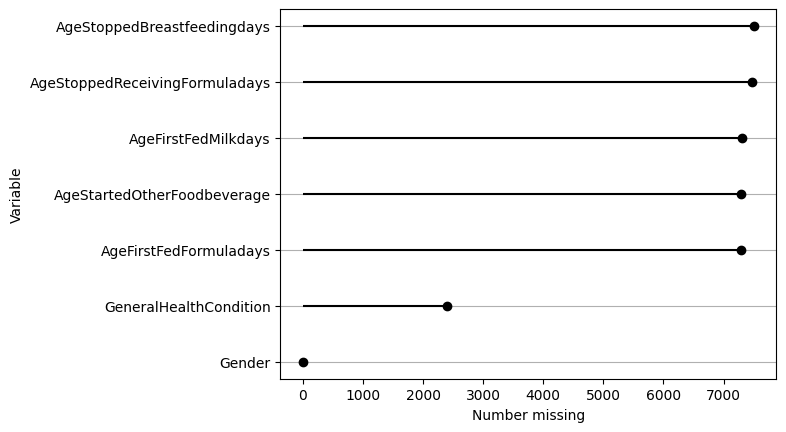

In [49]:
nhanes_df.missing.missing_variable_plot()

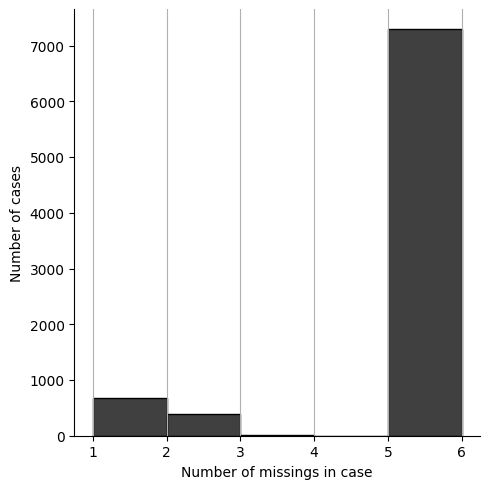

In [51]:
nhanes_df.missing.missing_case_plot()

<Axes: >

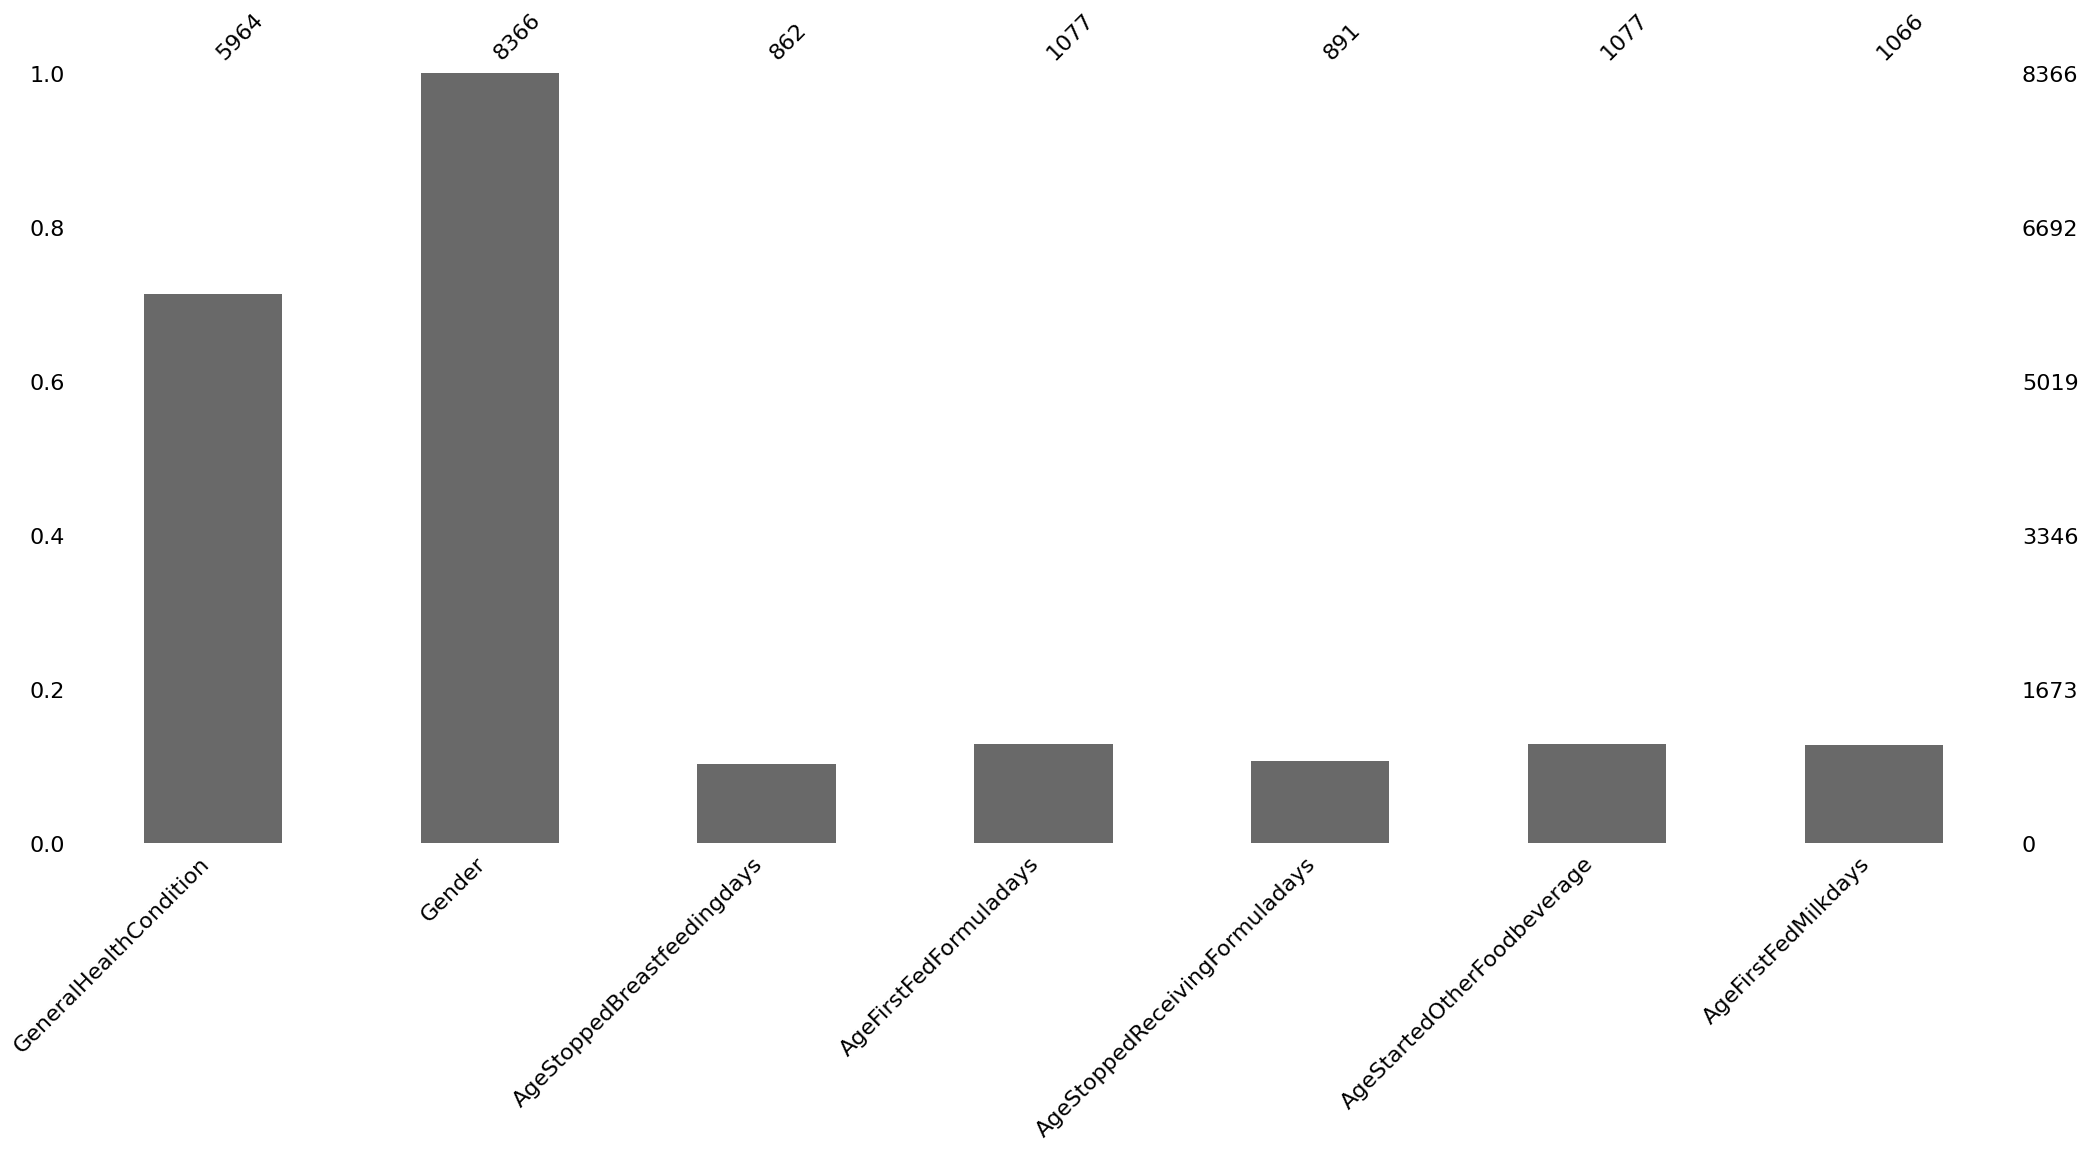

In [56]:
missingno.bar(df = nhanes_df)

<Axes: >

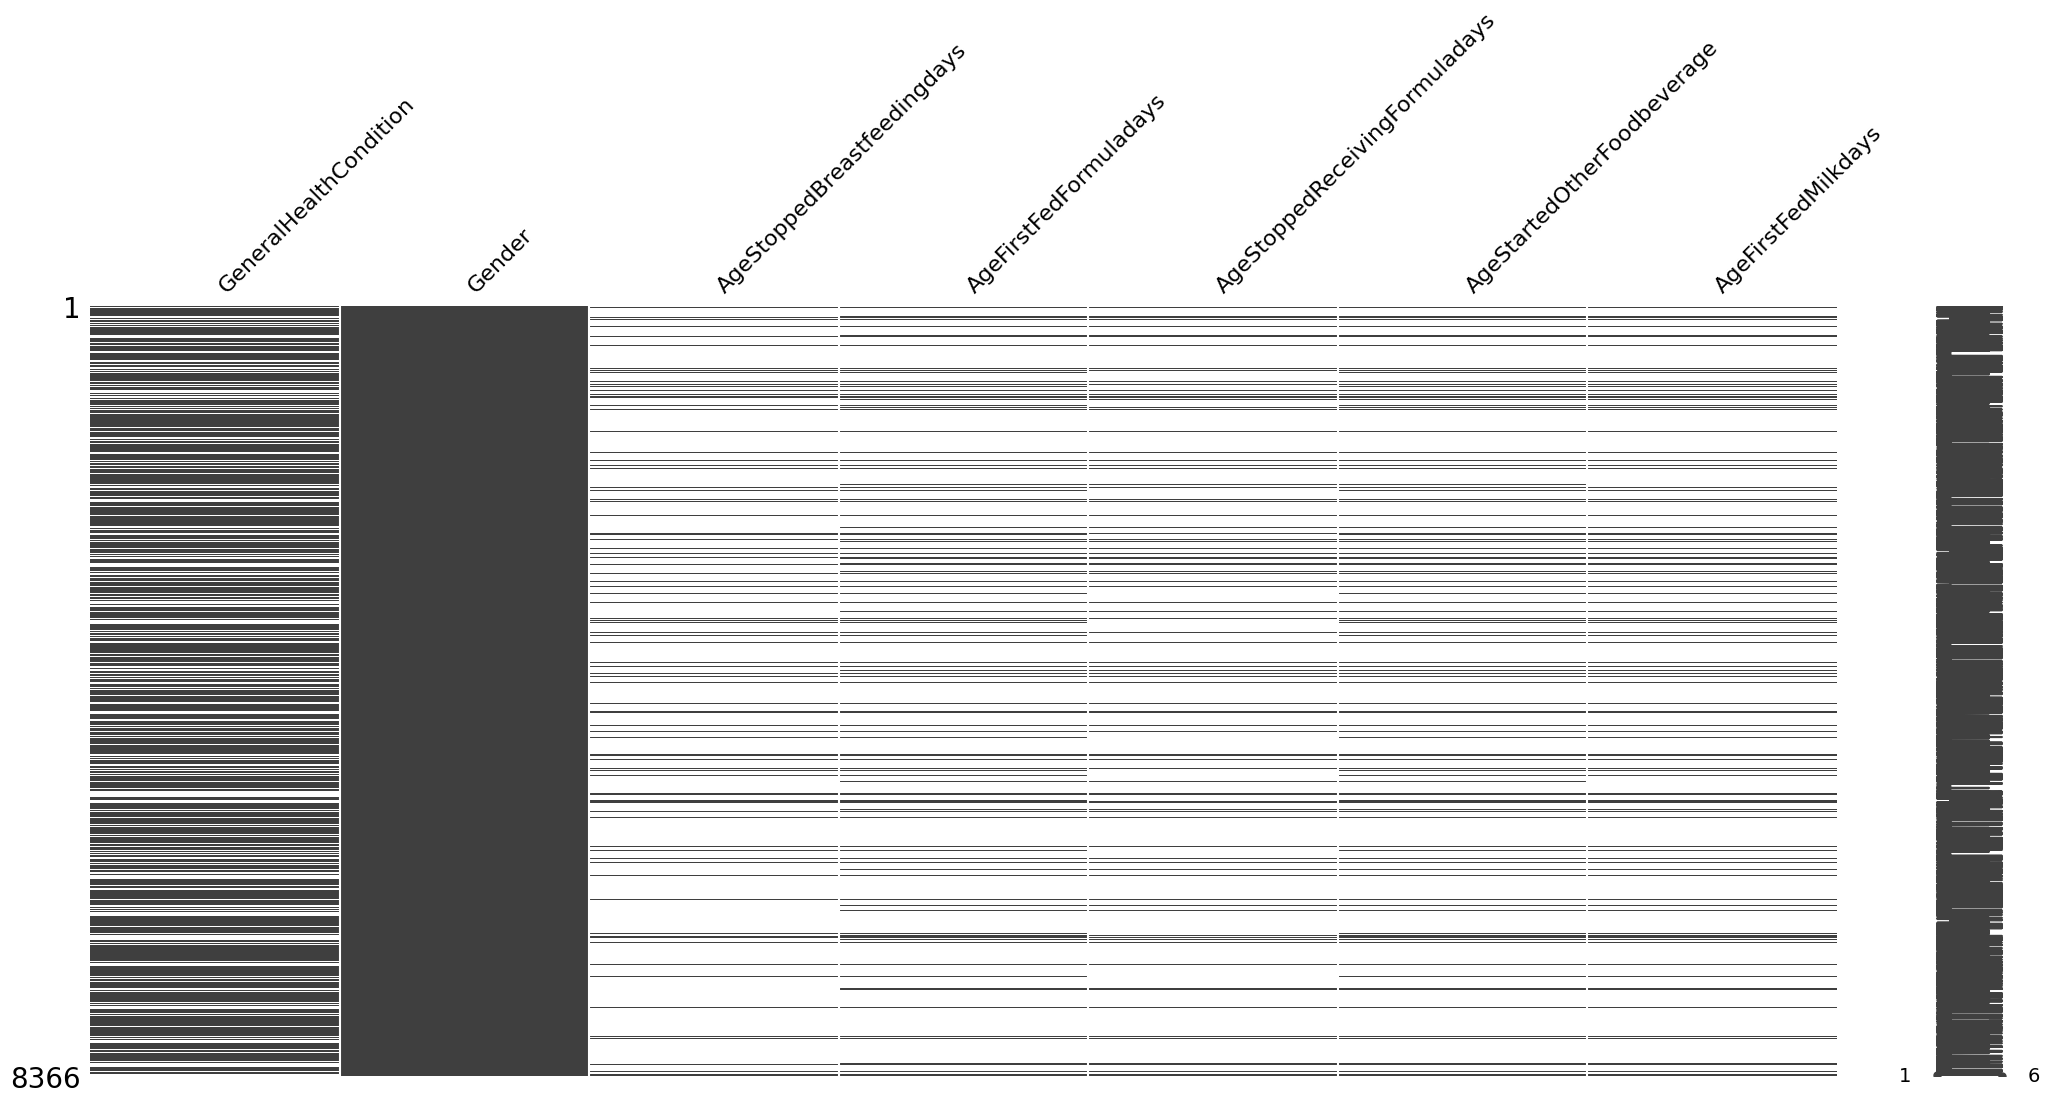

In [57]:
missingno.matrix(df = nhanes_df)

<Axes: >

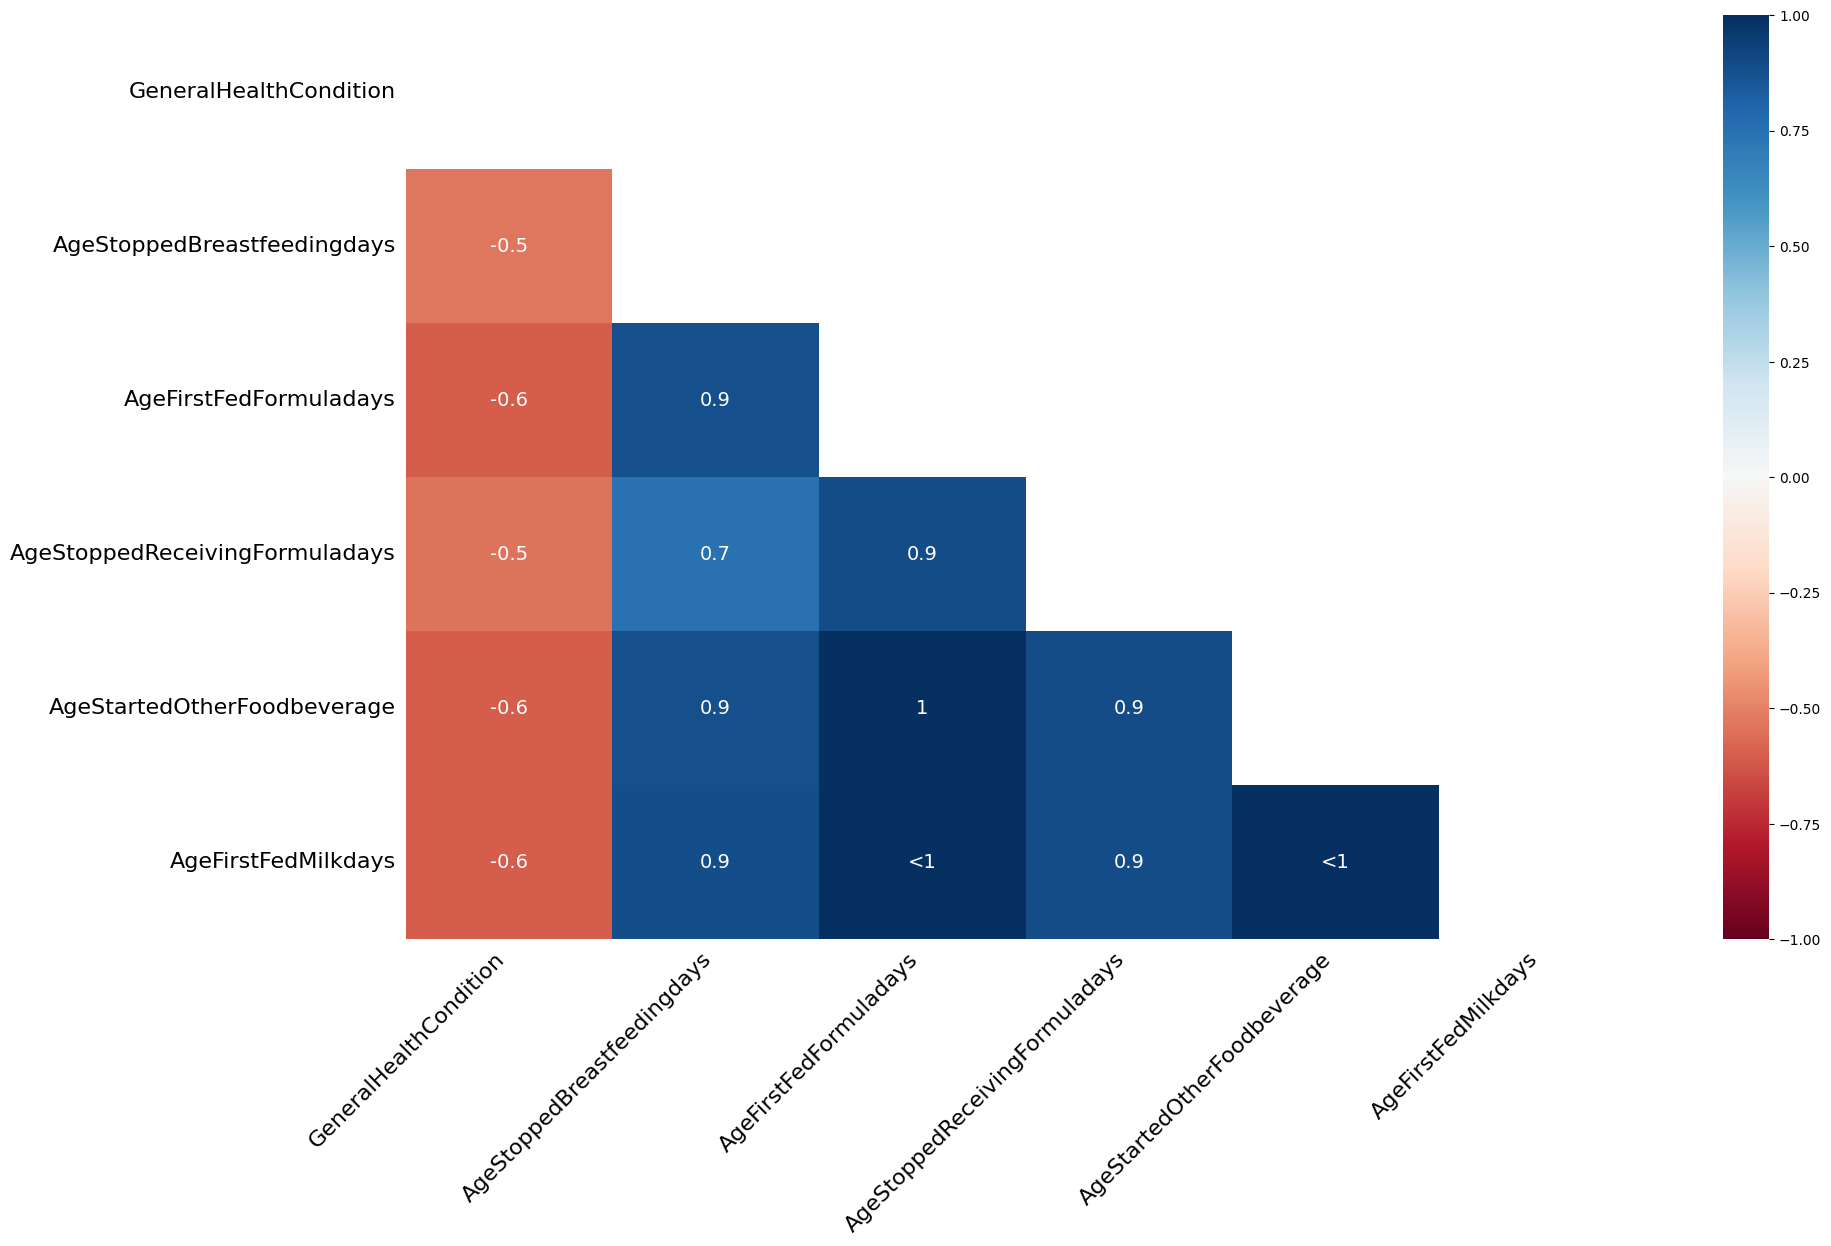

In [52]:
missingno.heatmap(df = nhanes_df)

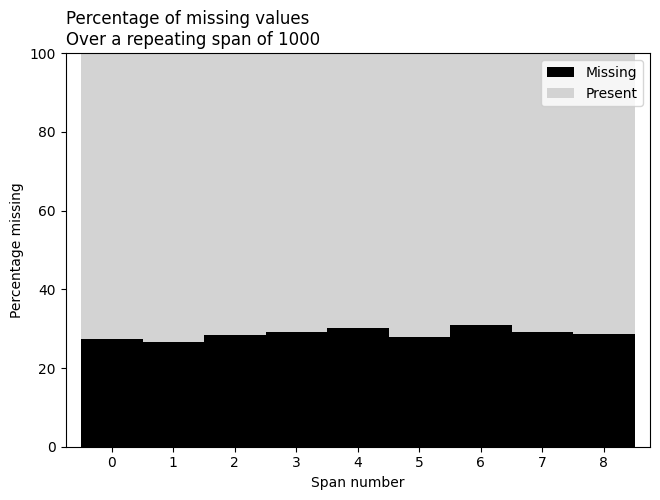

In [58]:
(
    nhanes_df
    .missing
    .missing_variable_span_plot(
        variable="GeneralHealthCondition",
        span_every=1000,
        rot=0
    )
)